##Sentiment Analysis
* Classification of people's opinion or expressions into different sentiments such as Positive,Neutral and Negative.

Importing Necessary Libraries

In [1]:
!pip install pyspellchecker

     |████████████████████████████████| 1.9MB 2.5MB/s 


In [2]:
%matplotlib inline

In [111]:
weather_data=pd.read_csv('weather_data.csv')
weather_data.head(2)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,...,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.0,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.000000,76.536426,38.593017,-61.752587,22.363665,0.021080,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,...,0.000000,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,NaN,NaN,0.000000,NaN,NaN,NaN,76.536426,38.593017,-61.752587,22.363665,NaN,-1.231330,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.00004,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.6,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,0.018360,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.015200,61.402626,-74.457583,...,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000150,0.433957,0.00005,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652


In [3]:
# to hide warnings
import warnings
warnings.filterwarnings('ignore')

# basic data processing
import os
import datetime
import pandas as pd
import numpy as np

# for EDA
from pandas_profiling import ProfileReport

# for text preprocessing
import re
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from spellchecker import SpellChecker

# progress bar
from tqdm.auto import tqdm
from tqdm import tqdm_notebook

# instantiate
tqdm.pandas(tqdm_notebook)

# for wordcloud
from PIL import Image
from wordcloud import WordCloud

# for aesthetics and plots
from IPython.display import display, Markdown, clear_output
from termcolor import colored

import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.offline import plot, iplot
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "notebook"

# for model
import tensorflow as tf
import tensorflow_hub as hub
import keras.layers as layers
from keras.models import Model
from keras import backend as K
import keras
from keras.models import load_model

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
data=pd.read_csv('BeforeLD.csv')

In [5]:
data.head(5)

,id,created_at,original_text,clean_text,polarity,subjectivity,favorite_count,retweet_count,possibly_sensitive,hashtags,user_mentions,place
0,1200462491156963328,Fri Nov 29 17:12:16 +0000 2019,It's another SustyFriday. Today we wade into ...,It 's another SustyFriday Today wade Air Pollu...,0.000000,0.000000,13,8,False,"Sustyfacts, Sustyfriday",SustyVibes,NaN
1,1200469208917823488,Fri Nov 29 17:38:57 +0000 2019,Get the required information and knowledge abo...,Get required information knowledge Thank thread,0.000000,0.000000,0,1,False,"AirPollution, Nigeria, StareDownOnPollution, B...",cylexi,"Lagos, Nigeria"
2,1191998173176356864,Wed Nov 06 08:38:05 +0000 2019,#AirPollution kills 7 million people every yea...,kills million people every year main driver Ch...,0.275556,0.457778,0,0,False,"AirPollution, ClimateChange",NaN,"Lagos, Nigeria"
3,1211632839185313798,Mon Dec 30 12:59:14 +0000 2019,Climate Change can Bastardize the ecological f...,Climate Change Bastardize ecological footprint...,-0.115909,0.530303,0,1,False,NaN,NaN,"Ikeja, Nigeria"
4,1191944548412469248,Wed Nov 06 05:05:00 +0000 2019,Pollution in Delhi has hit dangerous levels - ...,Pollution Delhi hit dangerous levels entering ...,-0.600000,0.900000,250,169,False,NaN,NaN,NaN


In [6]:
data.isnull().sum()

id                     0
created_at             0
original_text          0
clean_text             2
polarity               0
subjectivity           0
favorite_count         0
retweet_count          0
possibly_sensitive    16
hashtags              25
user_mentions         48
place                 13
dtype: int64

In [7]:
data.polarity.unique()

array([ 0.        ,  0.27555556, -0.11590909, -0.6       , -0.01515152,
       -0.625     ,  0.65      ,  0.44166667, -0.1       ,  0.2       ,
        0.6       ,  0.3       ,  0.5       , -0.4       ,  0.7       ,
        0.4       ,  0.25625   ,  0.18333333,  1.        ,  0.05      ,
        0.1       , -0.02916667,  0.3125    ,  0.32083333,  0.21666667,
        0.06393939, -0.2       , -0.1       ,  0.13636364,  0.39166667,
        0.04      ,  0.375     ,  0.3875    ,  0.25      ,  0.8       ,
        0.11666667, -0.1375    ,  0.47      ])

In [8]:
def get_sentiment(value):
  if value > 0:
        return 'positive'
  elif value == 0:
        return 'neutral'
  else:
        return 'negative'

In [9]:
data['sentiment']=data['polarity'].apply(get_sentiment)
data

,id,created_at,original_text,clean_text,polarity,subjectivity,favorite_count,retweet_count,possibly_sensitive,hashtags,user_mentions,place,sentiment
0,1200462491156963328,Fri Nov 29 17:12:16 +0000 2019,It's another SustyFriday. Today we wade into ...,It 's another SustyFriday Today wade Air Pollu...,0.000000,0.000000,13,8,False,"Sustyfacts, Sustyfriday",SustyVibes,NaN,neutral
1,1200469208917823488,Fri Nov 29 17:38:57 +0000 2019,Get the required information and knowledge abo...,Get required information knowledge Thank thread,0.000000,0.000000,0,1,False,"AirPollution, Nigeria, StareDownOnPollution, B...",cylexi,"Lagos, Nigeria",neutral
2,1191998173176356864,Wed Nov 06 08:38:05 +0000 2019,#AirPollution kills 7 million people every yea...,kills million people every year main driver Ch...,0.275556,0.457778,0,0,False,"AirPollution, ClimateChange",NaN,"Lagos, Nigeria",positive
3,1211632839185313798,Mon Dec 30 12:59:14 +0000 2019,Climate Change can Bastardize the ecological f...,Climate Change Bastardize ecological footprint...,-0.115909,0.530303,0,1,False,NaN,NaN,"Ikeja, Nigeria",negative
4,1191944548412469248,Wed Nov 06 05:05:00 +0000 2019,Pollution in Delhi has hit dangerous levels - ...,Pollution Delhi hit dangerous levels entering ...,-0.600000,0.900000,250,169,False,NaN,NaN,NaN,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1219283399262851074,Mon Jan 20 15:39:50 +0000 2020,What should be the #1 priority for the @IMOHQ ...,What priority Secretary General starts second ...,-0.137500,0.475000,0,0,False,"emissions, ClimateCrisis",IMOHQ,"Nairobi, Kenya",negative
72,1217660584000479232,Thu Jan 16 04:11:20 +0000 2020,Capitol of Ethiopia and African Union bathing ...,Capitol Ethiopia African Union bathing morning...,0.000000,0.000000,4,0,False,"smog, airquality, urbanization, megatrends","mega_sense, INAR_fin","Nairobi, Kenya",neutral
73,1212994404111265792,Fri Jan 03 07:09:36 +0000 2020,First run 🏃 in Jan 2020. Few days ago I was at...,First run Jan Few days ago I home air pollutio...,0.470000,0.586667,60,27,False,AirPollution,governorkingi,"Kilifi, Kenya",positive
74,1233718989521637376,Sat Feb 29 11:41:43 +0000 2020,#AirPollution is an existential urban developm...,existential urban development threat This comi...,0.000000,0.000000,9,7,False,"AirPollution, KlaCleanAir, UgandaGreenGrowth",KCCAUG,Golden Tulip Hotel,neutral


**EDA**

In [ ]:
data.describe()

,id,polarity,subjectivity,favorite_count,retweet_count
count,7.600000e+01,76.000000,76.000000,76.000000,76.000000
mean,1.213157e+18,0.154148,0.372954,113.723684,38.105263
std,1.663842e+16,0.307603,0.321293,603.490571,201.369086
min,1.190203e+18,-0.625000,0.000000,0.000000,0.000000
25%,1.200417e+18,0.000000,0.000000,0.000000,0.000000
50%,1.211759e+18,0.045000,0.400000,2.000000,0.000000
75%,1.228017e+18,0.388542,0.540625,11.500000,4.000000
max,1.244402e+18,1.000000,1.000000,4180.000000,1492.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  76 non-null     int64  
 1   created_at          76 non-null     object 
 2   original_text       76 non-null     object 
 3   clean_text          74 non-null     object 
 4   polarity            76 non-null     float64
 5   subjectivity        76 non-null     float64
 6   favorite_count      76 non-null     int64  
 7   retweet_count       76 non-null     int64  
 8   possibly_sensitive  60 non-null     object 
 9   hashtags            51 non-null     object 
 10  user_mentions       28 non-null     object 
 11  place               63 non-null     object 
 12  sentiment           76 non-null     object 
dtypes: float64(2), int64(3), object(8)
memory usage: 7.8+ KB


Dropping irrelevant columns

In [10]:
data.clean_text.dropna()

0     It 's another SustyFriday Today wade Air Pollu...
1       Get required information knowledge Thank thread
2     kills million people every year main driver Ch...
3     Climate Change Bastardize ecological footprint...
4     Pollution Delhi hit dangerous levels entering ...
                            ...                        
71    What priority Secretary General starts second ...
72    Capitol Ethiopia African Union bathing morning...
73    First run Jan Few days ago I home air pollutio...
74    existential urban development threat This comi...
75    Jane Rendell makes facilitation breakout sessi...
Name: clean_text, Length: 74, dtype: object

In [11]:
data.columns

Index(['id', 'created_at', 'original_text', 'clean_text', 'polarity',
       'subjectivity', 'favorite_count', 'retweet_count', 'possibly_sensitive',
       'hashtags', 'user_mentions', 'place', 'sentiment'],
      dtype='object')

In [19]:
data.head(5)

,id,created_at,original_text,clean_text,polarity,subjectivity,favorite_count,retweet_count,possibly_sensitive,hashtags,user_mentions,place,sentiment
0,1200462491156963328,Fri Nov 29 17:12:16 +0000 2019,It's another SustyFriday. Today we wade into ...,It 's another SustyFriday Today wade Air Pollu...,0.000000,0.000000,13,8,False,"Sustyfacts, Sustyfriday",SustyVibes,NaN,neutral
1,1200469208917823488,Fri Nov 29 17:38:57 +0000 2019,Get the required information and knowledge abo...,Get required information knowledge Thank thread,0.000000,0.000000,0,1,False,"AirPollution, Nigeria, StareDownOnPollution, B...",cylexi,"Lagos, Nigeria",neutral
2,1191998173176356864,Wed Nov 06 08:38:05 +0000 2019,#AirPollution kills 7 million people every yea...,kills million people every year main driver Ch...,0.275556,0.457778,0,0,False,"AirPollution, ClimateChange",NaN,"Lagos, Nigeria",positive
3,1211632839185313798,Mon Dec 30 12:59:14 +0000 2019,Climate Change can Bastardize the ecological f...,Climate Change Bastardize ecological footprint...,-0.115909,0.530303,0,1,False,NaN,NaN,"Ikeja, Nigeria",negative
4,1191944548412469248,Wed Nov 06 05:05:00 +0000 2019,Pollution in Delhi has hit dangerous levels - ...,Pollution Delhi hit dangerous levels entering ...,-0.600000,0.900000,250,169,False,NaN,NaN,NaN,negative


In [40]:
#def get_date_time(dates):
# for date in dates:
#    print(date)
#    new_datetime = datetime.strftime(datetime.strptime(date,'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d')
#    return new_datetime

In [42]:
data['date']= data['created_at'].apply(lambda x:datetime.strftime(datetime.strptime(x,'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d'))

#print(get_date_time(data['created_at'][0]))

data.head(4)

   

,id,created_at,original_text,clean_text,polarity,subjectivity,favorite_count,retweet_count,possibly_sensitive,hashtags,user_mentions,place,sentiment,date
0,1200462491156963328,Fri Nov 29 17:12:16 +0000 2019,It's another SustyFriday. Today we wade into ...,It 's another SustyFriday Today wade Air Pollu...,0.000000,0.000000,13,8,False,"Sustyfacts, Sustyfriday",SustyVibes,NaN,neutral,2019-11-29
1,1200469208917823488,Fri Nov 29 17:38:57 +0000 2019,Get the required information and knowledge abo...,Get required information knowledge Thank thread,0.000000,0.000000,0,1,False,"AirPollution, Nigeria, StareDownOnPollution, B...",cylexi,"Lagos, Nigeria",neutral,2019-11-29
2,1191998173176356864,Wed Nov 06 08:38:05 +0000 2019,#AirPollution kills 7 million people every yea...,kills million people every year main driver Ch...,0.275556,0.457778,0,0,False,"AirPollution, ClimateChange",NaN,"Lagos, Nigeria",positive,2019-11-06
3,1211632839185313798,Mon Dec 30 12:59:14 +0000 2019,Climate Change can Bastardize the ecological f...,Climate Change Bastardize ecological footprint...,-0.115909,0.530303,0,1,False,NaN,NaN,"Ikeja, Nigeria",negative,2019-12-30


In [43]:
data.date.unique()

array(['2019-11-29', '2019-11-06', '2019-12-30', '2019-12-31',
       '2020-01-18', '2020-03-21', '2020-02-18', '2020-02-12',
       '2019-11-01', '2019-11-12', '2019-11-30', '2019-12-02',
       '2020-02-03', '2019-12-18', '2020-01-13', '2019-12-06',
       '2020-03-19', '2019-11-16', '2020-03-22', '2019-11-13',
       '2019-12-12', '2020-03-17', '2020-03-29', '2020-01-10',
       '2020-03-24', '2020-02-13', '2020-02-26', '2020-02-29',
       '2020-03-13', '2020-02-28', '2020-03-03', '2020-01-07',
       '2019-12-15', '2020-02-14', '2019-11-14', '2019-12-11',
       '2020-02-21', '2020-01-09', '2019-11-07', '2019-12-28',
       '2020-01-16', '2019-11-15', '2019-12-10', '2020-01-20',
       '2020-01-03'], dtype=object)

In [110]:
tweets_per_day=data.groupby(['date','sentiment'])['sentiment'].count().reset_index(False)
tweets_per_day=pd.DataFrame(tweets_per_day)

KeyError: ignored

In [107]:
tweets_per_day

,date,sentiment
0,2019-11-01,2
1,2019-11-01,1
2,2019-11-06,2
3,2019-11-06,2
4,2019-11-07,1
...,...,...
57,2020-03-21,1
58,2020-03-22,1
59,2020-03-22,1
60,2020-03-24,1


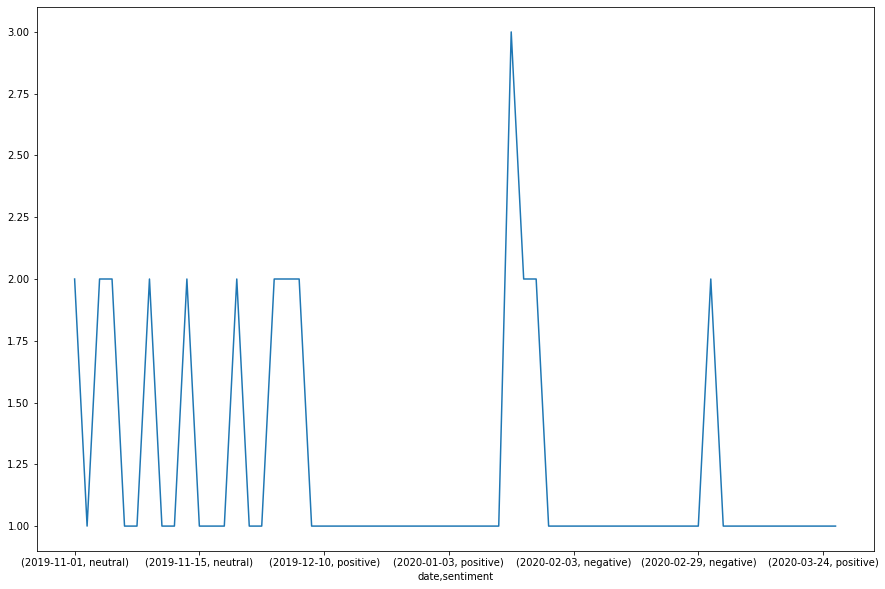

In [58]:
plt.figure(figsize=(15,10))
plt.plot(x='date',y='',data=tweets_per_day,hue='sentiment')


In [85]:
data['tweet_date']=pd.to_datetime(data['date']).dt.date
tweet_date=data['tweet_date'].value_counts().to_frame().reset_index().rename(columns={'index':'date','tweet_date':'count'})
tweet_date['date']=pd.to_datetime(tweet_date['date'])
tweet_date=tweet_date.sort_values('date',ascending=False)
tweet_date.head(5)

,date,count
24,2020-03-29,1
30,2020-03-24,1
16,2020-03-22,2
11,2020-03-21,2
37,2020-03-19,1


In [101]:
%matplotlib inline
import seaborn as sns
sns.lineplot(x="date",y='count',data="tweet_date")

ValueError: ignored

In [12]:
df=data.copy()
df.drop(['id', 'created_at', 'original_text', 'polarity',
       'subjectivity', 'favorite_count', 'retweet_count', 'possibly_sensitive',
       'hashtags', 'user_mentions', 'place'],axis=1,inplace=True)
df

,clean_text,sentiment
0,It 's another SustyFriday Today wade Air Pollu...,neutral
1,Get required information knowledge Thank thread,neutral
2,kills million people every year main driver Ch...,positive
3,Climate Change Bastardize ecological footprint...,negative
4,Pollution Delhi hit dangerous levels entering ...,negative
...,...,...
71,What priority Secretary General starts second ...,negative
72,Capitol Ethiopia African Union bathing morning...,neutral
73,First run Jan Few days ago I home air pollutio...,positive
74,existential urban development threat This comi...,neutral


In [13]:
df.dropna(inplace=True)
df.isnull().sum()

clean_text    0
sentiment     0
dtype: int64

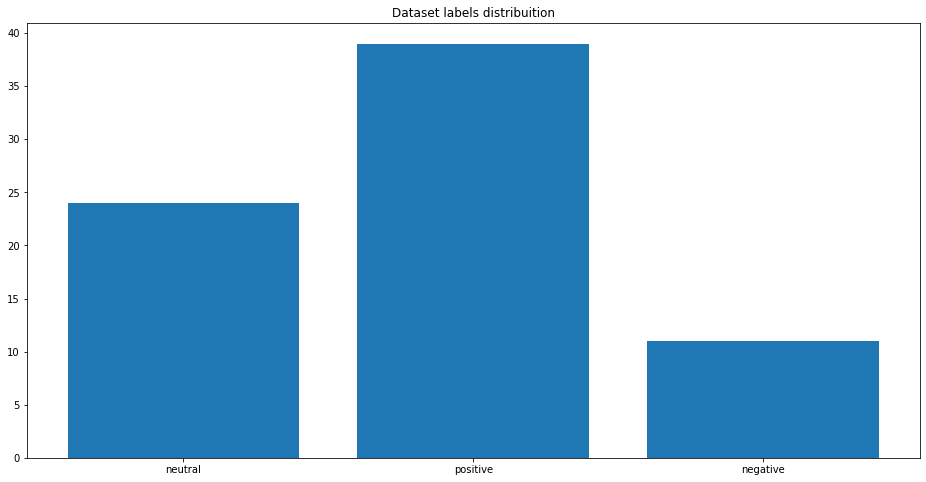

In [17]:
%matplotlib inline
from collections import Counter
sentiment_cnt = Counter(df.sentiment)

plt.figure(figsize=(16,8))
plt.bar(sentiment_cnt.keys(), sentiment_cnt.values())
plt.title("Dataset labels distribuition")
plt.show()

In [18]:
df.head(5)

,clean_text,sentiment
0,It 's another SustyFriday Today wade Air Pollu...,neutral
1,Get required information knowledge Thank thread,neutral
2,kills million people every year main driver Ch...,positive
3,Climate Change Bastardize ecological footprint...,negative
4,Pollution Delhi hit dangerous levels entering ...,negative


>>>More positive text,then,neutral then negative.


* **TEXT PREPROCESSING**

**STOP WORDS** -remove the most common words in a language since they don't provide any info. about the statements.

**LEMMATIZATION**-This is part of normalization which involves bringing words to thier root forms eg 'am' and 'are'  become 'be'.

**Lower casing**

**Spelling correction**


In [ ]:
# set of stop words declared
stop_words = stopwords.words('english')

updated_stop_words = stop_words.copy()
for word in stop_words:
    if "n't" in word or "no" in word or word.endswith('dn') or word.endswith('sn') or word.endswith('tn'):
        updated_stop_words.remove(word)

# custom select words you don't want to eliminate since we're interested in the sentiment
words_to_remove = ['for','by','with','against','shan','don','aren','haven','weren','until','ain','but','off','out']
for word in words_to_remove:
    updated_stop_words.remove(word)

In [ ]:
import nltk
nltk.download('wordnet')

# creating instance of lemmatizer
lemm = WordNetLemmatizer()
def preprocess(tweet):
  #lowercase the tweets
  #try:
  tweet =tweet.lower().strip()
  #except AttributeError as e:
  #  tweet =tweet.astype(str).lower().strip()
  #  continue 

  splitted_tweet=tweet.split()

  tweetwords=''

  for word in splitted_tweet:
    #checking if the word is a stopword
    if word not in updated_stop_words:
      if len(word)>1:
        #lemmatize the word
        lem_word=lemm.lemmatize(word)
        tweetwords+=(lem_word +' ')
  return tweetwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df['text']=df['clean_text'].apply(preprocess)
df.head(5)

,clean_text,sentiment,text
0,It 's another SustyFriday Today wade Air Pollu...,neutral,'s another sustyfriday today wade air pollutio...
1,Get required information knowledge Thank thread,neutral,get required information knowledge thank thread
2,kills million people every year main driver Ch...,positive,kill million people every year main driver chi...
3,Climate Change Bastardize ecological footprint...,negative,climate change bastardize ecological footprint...
4,Pollution Delhi hit dangerous levels entering ...,negative,pollution delhi hit dangerous level entering `...


In [ ]:
def plot_wordcloud(text, title = None):
    wordcloud = WordCloud(background_color='black', max_words = 200,
                          max_font_size = 20, random_state = 42)
    wordcloud.generate(text)
    
    plt.figure(figsize=(18,17))
    
    plt.imshow(wordcloud)
    plt.title(title, fontdict={'size': 40, 'verticalalignment': 'bottom'})
    plt.axis('off')
    #plt.tight_layout()
    plt.show()

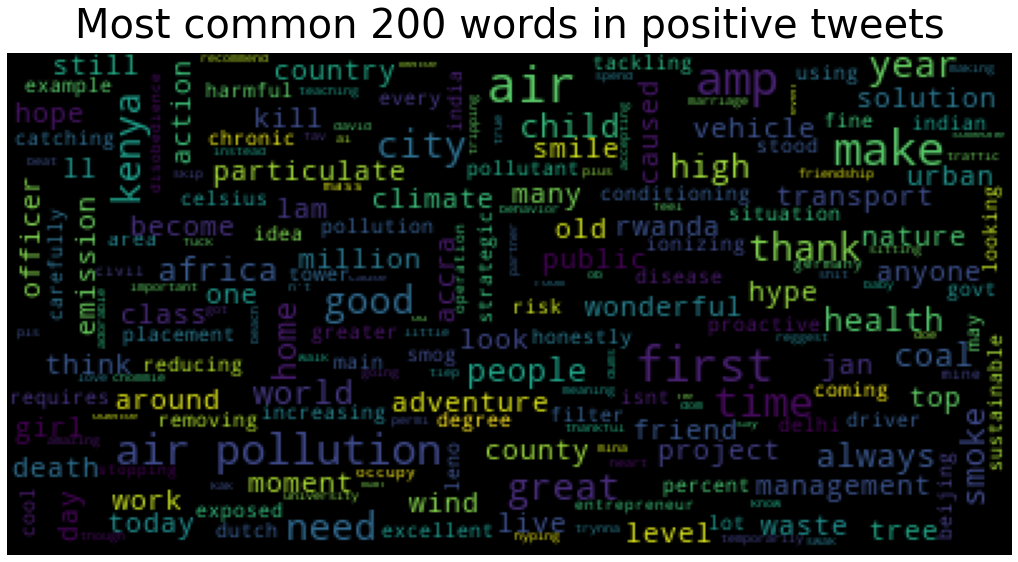

In [ ]:
pos_text = " ".join(df[df['sentiment'] == 'positive']['text'])


plot_wordcloud(pos_text,  title = 'Most common 200 words in positive tweets')


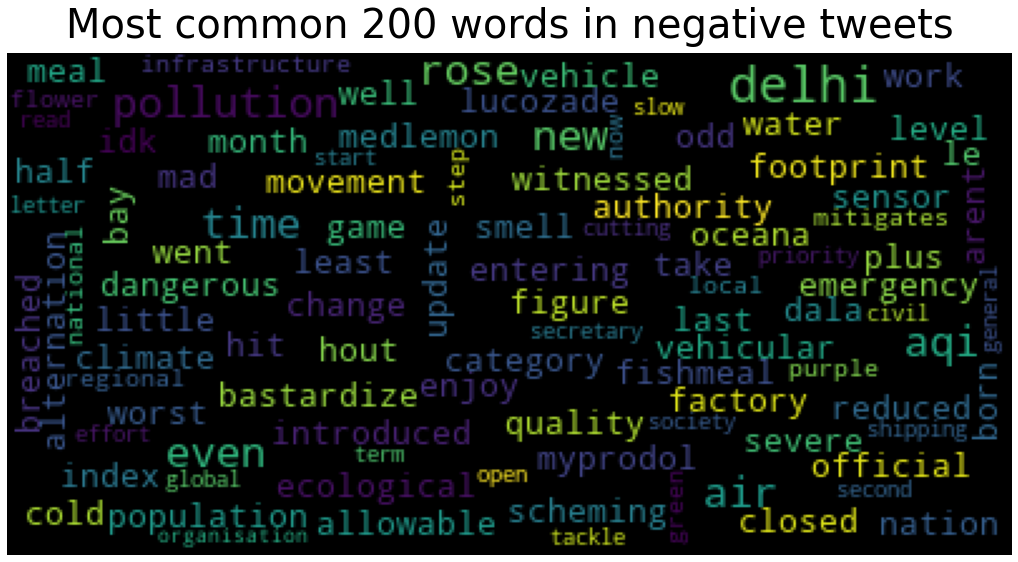

In [ ]:
neg_text = " ".join(df[df['sentiment'] == 'negative'].text)


plot_wordcloud(neg_text, title = 'Most common 200 words in negative tweets')

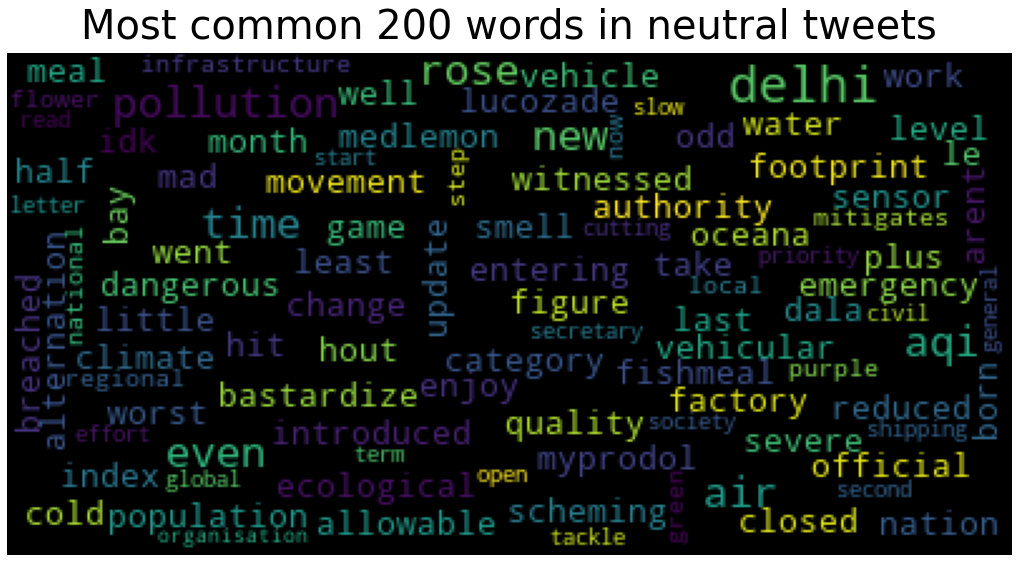

In [ ]:
neutral_text = " ".join(df[df['sentiment'] == 'neutral'].text)


plot_wordcloud(neg_text, title = 'Most common 200 words in neutral tweets')

**DATA SPLIT**

In [ ]:
def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=369):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.loc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.loc[perm[validate_end:]]
    return train, validate, test

train_df, val_df, test_df = train_validate_test_split(df)

print('Train: {}, Validation: {}, Test: {}'.format(train_df.shape, val_df.shape, test_df.shape))

print(colored('\nTRAIN DATA','magenta',attrs=['bold']))
display(train_df.head())

train_text = train_df['text'].tolist()
train_text = np.array(train_text, dtype=object)[:, np.newaxis]
train_label = np.asarray(pd.get_dummies(train_df['sentiment']), dtype = np.int8)

val_text = val_df['text'].tolist()
val_text = np.array(val_text, dtype=object)[:, np.newaxis]
val_label = np.asarray(pd.get_dummies(val_df['sentiment']), dtype = np.int8)

test_text = test_df['text'].tolist()
test_text = np.array(test_text, dtype=object)[:, np.newaxis]
test_label = np.asarray(pd.get_dummies(test_df['sentiment']), dtype = np.int8)

Train: (44, 3), Validation: (14, 3), Test: (16, 3)

TRAIN DATA


,clean_text,sentiment,text
23,I born game Les Dala..,negative,born game le dala..
68,Great hear Netherlands renewed support interes...,positive,great hear netherlands renewed support interes...
31,BBC News Millions masks distributed students '...,neutral,bbc news million mask distributed student 'gas...
29,even though I ai n't shit You still hype fuck ...,positive,even though ai n't shit still hype fuck me.. p...
44,A back I particulates campaign challenge I thi...,positive,back particulate campaign challenge think brin...


**FEATURE GENERATION USING BAG OF WORDS**

In [ ]:
#BoW converts text into the matrix of occurrence of words within a document.Concerned
#about whether given words occured or not in the document


#Generating document term matrix by using scikit-learn's CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['clean_text'])


In [ ]:
text_counts

<74x598 sparse matrix of type '<class 'numpy.int64'>'
	with 800 stored elements in Compressed Sparse Row format>

PREPROCESSING

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['sentiment']=le.fit_transform(df['sentiment'])

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.clean_text.isnull().sum()

0

SPLITTING DATASET

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df['sentiment'], test_size=0.3, random_state=1)

MODEL BUILDING AND EVALUATION

In [ ]:
#Building the text classification model using TF-IDF
#Import MultinomialNB module and create MNB classifier object
#Fit the model on atrain set using fit and perform prediction on the test set using predict()


from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5217391304347826


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['clean_text'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, df['sentiment'], test_size=0.3, random_state=123)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.4782608695652174


TRYING OUT 

In [ ]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

In [ ]:
#Pre-process dataset

from nltk.stem import SnowballStemmer
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [ ]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+", ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [ ]:
df.text=df.clean_text.apply(lambda x:preprocess(x))

* Split train and test set

In [ ]:
train,test = train_test_split(df,test_size=0.2,random_state=42)
print("Train Size",len(train))
print("Test Size",len(test))

Train Size 59
Test Size 15


In [ ]:
documents = [text.split() for text in train.text] 

In [ ]:
# WORD2VEC 
W2V_SIZE = 50
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 5

w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)

In [ ]:
w2v_model.build_vocab(documents)

In [ ]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 5


In [ ]:
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

(97, 22144)

In [ ]:
w2v_model.most_similar("air")

[('pollution', 0.15410445630550385),
 ('first', 0.09156601130962372),
 ('amp', 0.015796277672052383),
 ('time', -0.20208199322223663)]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train.text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 525


In [ ]:
x_train = pad_sequences(tokenizer.texts_to_sequences(train.text), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test.text), maxlen=SEQUENCE_LENGTH)

In [ ]:
# KERAS
SEQUENCE_LENGTH = 100
EPOCHS = 8
BATCH_SIZE = 1024

# SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.4, 0.7)

# EXPORT
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

In [ ]:
train

,clean_text,sentiment,text
23,I born game Les Dala..,negative,born game les dala
58,E-mobility way go order beat traffic cities,neutral,e mobility way go order beat traffic cities
51,Harmattan Accra peak Suspended sand particles ...,neutral,harmattan accra peak suspended sand particles ...
34,Unisa Western Cape Region,neutral,unisa western cape region
40,If smell pungent air morning theres east wind ...,positive,smell pungent air morning theres east wind blo...
72,Capitol Ethiopia African Union bathing morning...,neutral,capitol ethiopia african union bathing morning...
17,EXIT COAL ENTER FUTURE Massenhaft und ungehors...,neutral,exit coal enter future massenhaft und ungehors...
36,morning leigh_anne_kenny Seapoint Bantry Bay P...,neutral,morning leigh anne kenny seapoint bantry bay p...
45,My interview BBC World Service //,neutral,interview bbc world service
62,readings Vaisala AQT420 sensor sisal waste sit...,positive,readings vaisala aqt420 sensor sisal waste sit...


In [ ]:
labels = train.sentiment.unique().tolist()

labels

['negative', 'neutral', 'positive']

In [ ]:
encoder = LabelEncoder()
encoder.fit(train.sentiment.tolist())

y_train = encoder.transform(train.sentiment.tolist())
y_test = encoder.transform(test.sentiment.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (59, 1)
y_test (15, 1)


In [ ]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (59, 100)
y_train (59, 1)

x_test (15, 100)
y_test (15, 1)


In [ ]:
y_train[:10]

array([[0],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2]])

In [ ]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(525, 50)


In [ ]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

In [ ]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           26250     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               60400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 86,751
Trainable params: 60,501
Non-trainable params: 26,250
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/8
1/1 [==============================] - 0s 357ms/step - loss: 0.6931 - accuracy: 0.1509 - val_loss: 0.6777 - val_accuracy: 0.3333
Epoch 2/8
1/1 [==============================] - 0s 32ms/step - loss: 0.6814 - accuracy: 0.3208 - val_loss: 0.6598 - val_accuracy: 0.3333
Epoch 3/8
1/1 [==============================] - 0s 34ms/step - loss: 0.6680 - accuracy: 0.3208 - val_loss: 0.6383 - val_accuracy: 0.3333
Epoch 4/8
1/1 [==============================] - 0s 35ms/step - loss: 0.6518 - accuracy: 0.3208 - val_loss: 0.6118 - val_accuracy: 0.3333
Epoch 5/8
1/1 [==============================] - 0s 32ms/step - loss: 0.6317 - accuracy: 0.3208 - val_loss: 0.5783 - val_accuracy: 0.3333
Epoch 6/8
1/1 [==============================] - 0s 31ms/step - loss: 0.6066 - accuracy: 0.3208 - val_loss: 0.5335 - val_accuracy: 0.3333
Epoch 7/8
1/1 [==============================] - 0s 31ms/step - loss: 0.5742 - accuracy: 0.3208 - val_loss: 0.4699 - val_accuracy: 0.3333
Epoch 8/8
1/1 [==================

In [ ]:
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

1/1 [==============================] - 0s 1ms/step - loss: 0.4860 - accuracy: 0.3333

ACCURACY: 0.3333333432674408
LOSS: 0.48600468039512634


In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

KeyError: ignored

In [ ]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = NEUTRAL
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE

In [ ]:
def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}  

In [ ]:

y_pred_1d = []
y_test_1d = list(test.sentiment)
scores = model.predict(x_test, verbose=1, batch_size=8000)
y_pred_1d = [decode_sentiment(score, include_neutral=False) for score in scores]

1/1 [==============================] - 0s 1ms/step


In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

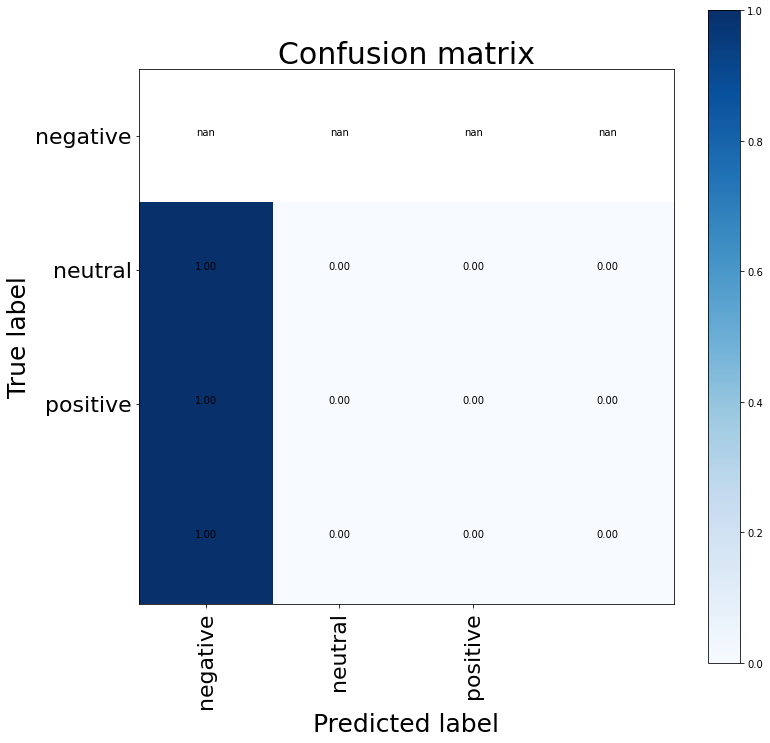

In [ ]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=train.sentiment.unique(), title="Confusion matrix")
plt.show()

In [ ]:
#Classification Report
print(classification_report(y_test_1d, y_pred_1d))

              precision    recall  f1-score   support

    POSITIVE       0.00      0.00      0.00       0.0
    negative       0.00      0.00      0.00       3.0
     neutral       0.00      0.00      0.00       5.0
    positive       0.00      0.00      0.00       7.0

    accuracy                           0.00      15.0
   macro avg       0.00      0.00      0.00      15.0
weighted avg       0.00      0.00      0.00      15.0



In [ ]:
#Accuracy score
accuracy_score(y_test_1d, y_pred_1d)

0.0